In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 테란 로그 분석
- species : 0

테란 로그를 분석하기 위해 테-테 전 위주로 뽑아보자.

In [0]:
# p_0_t=train[(train['player']==0)&(train['species']==0)]['game_id']
# p_1_t=train[(train['player']==1)&(train['species']==0)]['game_id']

In [0]:
# k_1=set(p_0_t.values)
# k_2=set(p_1_t.values)

In [0]:
# only_t_game_id=k_1&k_2

In [0]:
# df_T=train[train['game_id'].isin(only_t_game_id)]

In [0]:
#df_T.to_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/스타2/df_Terran')

---

In [7]:
df_t = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/스타2/df_Terran') # 뒤에 확장자를 붙이지 않았는데 그래도 괜찮구만.
del df_t['Unnamed: 0']
df_t.head()

,game_id,winner,time,player,species,event,event_contents
0,0.0,1.0,0.0,0.0,0.0,0.0,"at (145.25, 21.5078125)"
1,0.0,1.0,0.0,1.0,0.0,0.0,"at (22.75, 147.0078125)"
2,0.0,1.0,0.0,0.0,0.0,1.0,['OrbitalCommand [3080001]']
3,0.0,1.0,0.0,0.0,0.0,2.0,(1360) - TrainSCV
4,0.0,1.0,0.0,0.0,0.0,0.0,"at (142.99609375, 24.50390625)"


In [0]:
event_code={'Camera': 0, 'Selection': 1, 'Ability': 2, 'Right Click': 3, 'SetControlGroup': 4, 'GetControlGroup': 5, 'AddToControlGroup': 6, 'ControlGroup': 7}

## event 0 : Camera
- Camera 위치를 보여주는 것
- 제일 나중에 처리해도 될 것같음.

In [9]:
df_t[(df_t['winner']==df_t['player'])&(df_t['event']==0)]

,game_id,winner,time,player,species,event,event_contents
1,0.0,1.0,0.0,1.0,0.0,0.0,"at (22.75, 147.0078125)"
30,0.0,1.0,0.0,1.0,0.0,0.0,"at (22.75, 145.90625)"
31,0.0,1.0,0.0,1.0,0.0,0.0,"at (22.75, 143.24609375)"
33,0.0,1.0,0.0,1.0,0.0,0.0,"at (22.75, 140.9921875)"
34,0.0,1.0,0.0,1.0,0.0,0.0,"at (23.1328125, 140.9921875)"
...,...,...,...,...,...,...,...
9908001,38866.0,1.0,0.0,1.0,0.0,0.0,"at (138.5, 160.7578125)"
9908024,38866.0,1.0,0.0,1.0,0.0,0.0,"at (127.74609375, 159.8125)"
9908026,38866.0,1.0,0.0,1.0,0.0,0.0,"at (126.98046875, 159.75)"
9908027,38866.0,1.0,0.0,1.0,0.0,0.0,"at (124.28515625, 159.75)"


## event 1 : Selection

In [10]:
df_t[(df_t['winner']==df_t['player'])&(df_t['event']==1)]

,game_id,winner,time,player,species,event,event_contents
57,0.0,1.0,0.0,1.0,0.0,1.0,['OrbitalCommand [33C0001]']
130,0.0,1.0,1.0,1.0,0.0,1.0,"['SCV [3400001]', 'SCV [3440001]', 'SCV [34C00..."
141,0.0,1.0,1.0,1.0,0.0,1.0,"['SCV [3680001]', 'SCV [3840001]']"
146,0.0,1.0,1.0,1.0,0.0,1.0,['Barracks [3A40002]']
183,0.0,1.0,2.0,1.0,0.0,1.0,['OrbitalCommand [33C0001]']
...,...,...,...,...,...,...,...
9908038,38866.0,1.0,0.0,1.0,0.0,1.0,"['SCV [3380001]', 'SCV [33C0001]', 'SCV [34800..."
9908040,38866.0,1.0,0.0,1.0,0.0,1.0,['DestructibleSignsConstruction [380001]']
9908042,38866.0,1.0,0.0,1.0,0.0,1.0,['SCV [34C0001]']
9908049,38866.0,1.0,0.0,1.0,0.0,1.0,['SCV [3400001]']


## event 2 : Ability

In [11]:
df_t['ability_kind']=df_t[df_t['event']==2]['event_contents'].apply(lambda x: x[8:]).apply(lambda x: x.split(';')[0])
df_t

,game_id,winner,time,player,species,event,event_contents,ability_kind
0,0.0,1.0,0.0,0.0,0.0,0.0,"at (145.25, 21.5078125)",NaN
1,0.0,1.0,0.0,1.0,0.0,0.0,"at (22.75, 147.0078125)",NaN
2,0.0,1.0,0.0,0.0,0.0,1.0,['OrbitalCommand [3080001]'],NaN
3,0.0,1.0,0.0,0.0,0.0,2.0,(1360) - TrainSCV,TrainSCV
4,0.0,1.0,0.0,0.0,0.0,0.0,"at (142.99609375, 24.50390625)",NaN
...,...,...,...,...,...,...,...,...
9908080,38866.0,1.0,0.0,1.0,0.0,5.0,NaN,NaN
9908081,38866.0,1.0,0.0,0.0,0.0,5.0,NaN,NaN
9908082,38866.0,1.0,0.0,1.0,0.0,1.0,"['SCV [3400001]', 'SCV [3440001]']",NaN
9908083,38866.0,1.0,0.0,1.0,0.0,5.0,NaN,NaN


In [0]:
ability_list=list(set(df_t[df_t['ability_kind'].isnull()==False]['ability_kind'].values))

In [13]:
len(ability_list)

147

 TrainSCV                         121659
Attack                             97272
 TrainMarine                       44413
 BuildSupplyDepot                  34715
CalldownMULE                       21859
 BuildRefinery                     18530
 BuildBarracks                     16359
 LowerSupplyDepot                  14036
 UpgradeToOrbitalCommand           11905
 BuildSiegeTank                    10335
 TrainReaper                        8782
 BuildFactory                       8299
 BuildCommandCenter                 8239
CancelLast                          7966
 BuildBarracksReactor               7424
 KD8Charge                          6850
 SiegeMode                          6499
 BuildStarport                      6331
Stop                                6102
 BuildMissileTurret                 5887
 BuildFactoryTechLab                5483
 TrainCyclone                       5440
 BuildBarracksTechLab               5223
 BuildEngineeringBay                5220
 TrainMedivac   

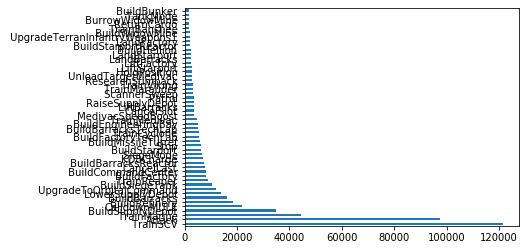

In [14]:
#상위 50개만 출력
top_50= df_t[df_t['ability_kind'].isnull()==False]['ability_kind'].value_counts(ascending=False).head(50)
top_50.plot(kind='barh')
plt.rc('ytick',labelsize=10)
top_50

테테,테저,테프 전에 따른 상위 명령어를 볼 필요가 있을 것 같음.

# Top 50 명령어 위주 추출 전처리

In [0]:
train = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/data/데이콘/스타2/train.pkl')
test = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/data/데이콘/스타2/test.pkl')

In [0]:
def top_ability(df,num):
  df['ability_content']=df[df['event']==2]['event_contents'].apply(lambda x: x[8:]).apply(lambda x: x.split(';')[0])
  data=df[df['event']==2][['game_id','winner','player','species','ability_content']]
  data=data.groupby('species')['ability_content'].value_counts().reset_index(name='count')
  
  return data[data['species']==0].head(num),data[data['species']==1].head(num),data[data['species']==2].head(num)

def make_df(ability_t,ability_z,ability_p):
  col_list=[]
  
  #종족별 상위 50개의 명령어를 col_list에 삽입
  for value in ability_t['ability_content']:
    col_list.append(value)
  for value in ability_z['ability_content']:
    col_list.append(value)
  for value in ability_p['ability_content']:
    col_list.append(value)
  
  # 중복제거를 위한 set처리 ex) attack
  col_list= list(set(col_list))

  # player 1과 2의 컬럼을 구분하기위해 col_list 변형 후,
  # new_colist에 컬럼이 될 것들을 넣고 컬럼 지정
  new_col_list=[]
  for col in col_list:
    for i in [0,1]:
      new_col_list.append('%s_%s'%(col,i))
  
  new_df = pd.DataFrame(columns=new_col_list)

  return new_df

def final_df(new_df,data):
  for id in set(data['game_id'].values):
    # 연산 시간 측정
    if id % 10000 ==0:
      print(id)
      %%time
    
    # game_id 별로 ability_content만 추출하자.
    data_0_values= data[(data['game_id']==id)&(data['player']==0)&(data['event']==2)]['ability_content'].values
    data_1_values= data[(data['game_id']==id)&(data['player']==1)&(data['event']==2)]['ability_content'].values
    
    # 값을 넣기 위한 0 삽입
    new_df.loc[id,:]=0

    # player 1 의 명령문 삽입
    for value in data_0_values:
      value= '%s_0'%(value)
      if value in new_df.columns:
        new_df.loc[id,value]+=1

    
    # player 2 의 명령문 삽입
    for value in data_1_values:
      value= '%s_1'%(value)
      if value in new_df.columns:
        new_df.loc[id,value]+=1
    
  return new_df

In [17]:
a,b,c=top_ability(train,50)
new_df=make_df(a,b,c)
final_df(new_df,train).to_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/스타2/train_top50_ability.csv')

a,b,c=top_ability(test,50)
new_df=make_df(a,b,c)
final_df(new_df,train).to_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/스타2/test_top50_ability.csv')

0.0
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


KeyboardInterrupt: ignored